<a href="https://colab.research.google.com/github/akajai/Ajai---Machine-Deep-Learning/blob/main/Handrwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KeyboardInterrupt: 

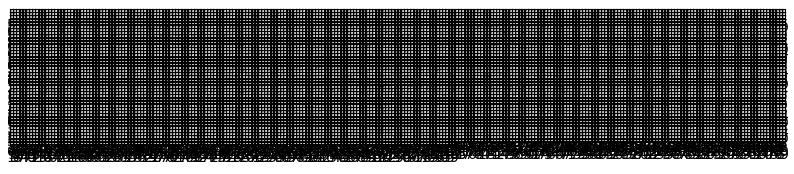

In [14]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(test_images, test_labels), (train_images, train_labels) = tf.keras.datasets.mnist.load_data()

rows=10
cols=10
plt.figure(figsize=(10,10))

for i in range(test_images.size):
  ax = plt.subplot(rows, cols, i + 1)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(test_labels[i])

plt.show()


train_images = train_images / 255.0
test_images = test_images / 255.0
#plt.show(test_images)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

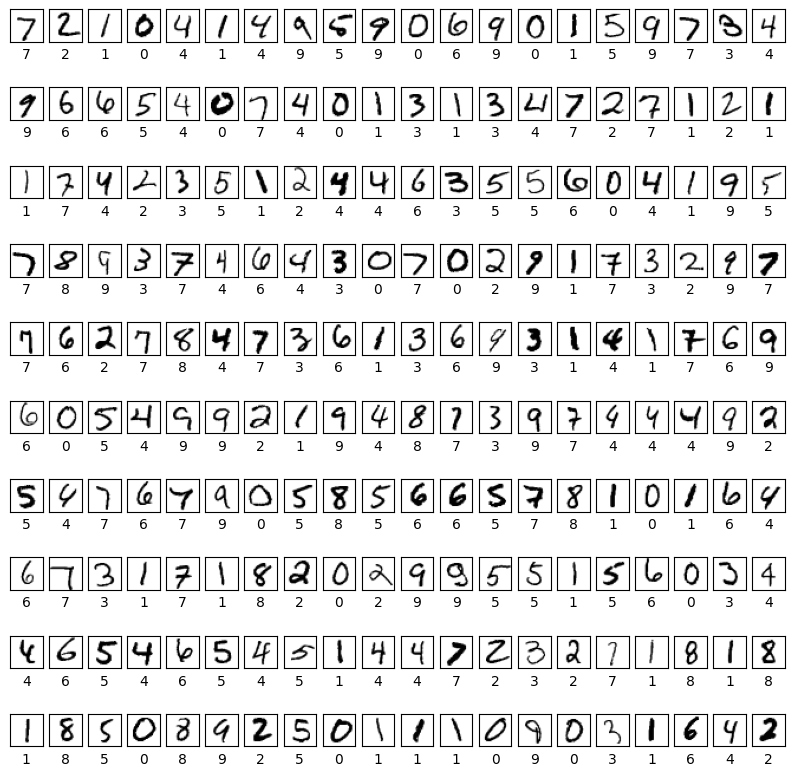

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8990 - loss: 0.3354
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9742 - loss: 0.0833
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9845 - loss: 0.0495
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9884 - loss: 0.0359
Epoch 5/30
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9916 - loss: 0.0267
Reached 99% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9916 - loss: 0.0267
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0795
[0.06498280167579651, 0.9807000160217285]


In [15]:
import pandas as pd
import tensorflow as tf
from keras.src.metrics.accuracy_metrics import accuracy
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
(train_images, train_labels),(test_images, test_labels),  = tf.keras.datasets.mnist.load_data()

rows=int(math.sqrt(len(test_images)))
cols=int(math.sqrt(len(test_images)))
rows=10
cols=20

plt.figure(figsize=(10,10))

for i in range(rows*cols):
  ax = plt.subplot(rows, cols, i + 1)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(test_labels[i])
  plt.xticks([])
  plt.yticks([])


plt.show()


train_images = train_images / 255.0
test_images = test_images / 255.0
#plt.show(test_images)

modelmnist=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                      tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                       tf.keras.layers.Dense(10,activation=tf.nn.softmax)

                                      ])
modelmnist.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelmnist.fit(train_images,train_labels,epochs=30,callbacks=[myCallback()])
evaluate=modelmnist.evaluate(test_images,test_labels)
print(evaluate)

